<h3>1. Import module yang dibutuhkan</h3>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h3>2. Load Dataset</h3>

In [2]:
imagePaths = 'Dataset\\'
label_list = ['JAHE', 'LENGKUAS']
data = []
labels = []

In [3]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [4]:
np.array(data).shape

(100, 32, 32, 3)

<h3>3. Data Preprocessing</h3>

In [5]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [6]:
print(labels)

['JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE'
 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE'
 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE'
 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE'
 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE' 'JAHE'
 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS'
 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS'
 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS'
 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS'
 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS'
 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS'
 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS'
 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS' 'LENGKUAS'
 'LENGKUAS' 'LENGKUAS']


In [7]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>4. Split Dataset</h3>

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


<h3>5. Build ANN Architecture</h3>

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [12]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [13]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [14]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 266ms/step - loss: 1.1296 - accuracy: 0.4750 - val_loss: 1.5765 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 166ms/step - loss: 0.8386 - accuracy: 0.6250 - val_loss: 0.8594 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 71ms/step - loss: 0.8794 - accuracy: 0.5000 - val_loss: 0.7091 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 70ms/step - loss: 0.6576 - accuracy: 0.5875 - val_loss: 1.1201 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 81ms/step - loss: 0.8348 - accuracy: 0.4750 - val_loss: 0.7152 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 44ms/step - loss: 0.6819 - accuracy: 0.6125 - val_loss: 0.6069 - val_accuracy: 0.8000
Epoch 7/100
3/3 [==============================] - 0s 44ms/step - loss: 0.5980 - accuracy: 0.8000 - val_loss: 0.5952 - val_accuracy: 0.8000
Epoch 8/100
3/3 [=

3/3 [==============================] - 0s 38ms/step - loss: 0.3624 - accuracy: 0.9500 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 35ms/step - loss: 0.4266 - accuracy: 0.7375 - val_loss: 0.4387 - val_accuracy: 0.8500
Epoch 61/100
3/3 [==============================] - 0s 35ms/step - loss: 0.3484 - accuracy: 0.9250 - val_loss: 0.7800 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5332 - accuracy: 0.6250 - val_loss: 0.7236 - val_accuracy: 0.6000
Epoch 63/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5042 - accuracy: 0.7125 - val_loss: 0.5542 - val_accuracy: 0.6000
Epoch 64/100
3/3 [==============================] - 0s 35ms/step - loss: 0.4160 - accuracy: 0.8875 - val_loss: 0.4802 - val_accuracy: 0.7000
Epoch 65/100
3/3 [==============================] - 0s 35ms/step - loss: 0.3801 - accuracy: 0.8375 - val_loss: 0.9154 - val_accuracy: 0.5000
Epoch 66/100
3/3 [========

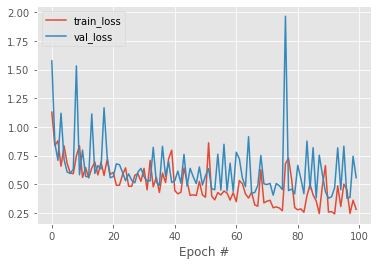

In [15]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [19]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

        JAHE       1.00      0.33      0.50        12
    LENGKUAS       0.50      1.00      0.67         8

    accuracy                           0.60        20
   macro avg       0.75      0.67      0.58        20
weighted avg       0.80      0.60      0.57        20



C:\Users\ASUS\AppData\Local\Temp/ipykernel_17920/954476436.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)


In [20]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_lengkuas.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.88302517]]


In [21]:
if q_pred<=0.5 :
    target = "Jahe"
else :
    target = "Lengkuas"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Output' in function 'cvDestroyWindow'


In [22]:
model.save('jahe_lengkuas_class_model_ann.h5')